In [2]:
import pandas as pd
import json
from pandas import json_normalize
from IPython.display import display
import os

In [3]:
def resumetable(df):

    new_df = pd.DataFrame(columns = ["type","nb_na","nb_val","lign1","ligne2","ligne3"], index = df.columns)

    for col in df.columns:
        liste = []

        liste.append(df[col].dtype)
        liste.append(df[col].isna().sum())
        liste.append(df[col].unique().shape[0])
        liste.append(df[col].iloc[0])
        liste.append(df[col].iloc[1])
        liste.append(df[col].iloc[2])
        
        new_df.loc[col]= liste

    return new_df

In [4]:
directory = "./json_files"
liste_fichiers = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
print(liste_fichiers)

['observations_0.json', 'observations_1.json', 'observations_10.json', 'observations_11.json', 'observations_2.json', 'observations_3.json', 'observations_4.json', 'observations_5.json', 'observations_6.json', 'observations_7.json', 'observations_8.json', 'observations_9.json']


In [5]:
df2 = pd.DataFrame()

for fichier in liste_fichiers:
    with open("json_files/" + fichier, 'r') as j:
        info = json.loads(j.read())

    df2 = pd.concat([df2,json_normalize(info)])

print(df2.columns)
print(df2.shape)
display(df2.head(10))


Index(['observation', 'label', 'image_id', 'image_url', 'user', 'date',
       'thumbnail', 'location', 'gbif_info.kingdom', 'gbif_info.family',
       'gbif_info.speciesKey', 'gbif_info.rank', 'gbif_info.phylum',
       'gbif_info.orderKey', 'gbif_info.species', 'gbif_info.confidence',
       'gbif_info.classKey', 'gbif_info.matchType', 'gbif_info.familyKey',
       'gbif_info.status', 'gbif_info.usageKey', 'gbif_info.kingdomKey',
       'gbif_info.genusKey', 'gbif_info.canonicalName', 'gbif_info.phylumKey',
       'gbif_info.class', 'gbif_info.synonym', 'gbif_info.scientificName',
       'gbif_info.genus', 'gbif_info.order', 'gbif_info.note', 'gbif_info'],
      dtype='object')
(650743, 32)


observation                    label image_id  \
0           1       Xylaria polymorpha        1   
1           2        Xylaria magnoliae        2   
2           3        Xylaria hypoxylon        3   
3           4        Xylaria hypoxylon        4   
4           5             Xeromphalina        5   
5           6  Xeromphalina campanella        6   
6           7     Xerocomellus zelleri        7   
7           8     Xerocomellus zelleri        8   
8           9  Xerocomus subtomentosus        9   
9           9  Xerocomus subtomentosus       10   

                                   image_url user                 date  \
0   http://mushroomobserver.org/images/320/1    1  2006-05-21 07:17:05   
1   http://mushroomobserver.org/images/320/2    1  2006-05-21 07:17:06   
2   http://mushroomobserver.org/images/320/3    1  2006-05-21 07:17:08   
3   http://mushroomobserver.org/images/320/4    1  2006-05-21 07:17:10   
4   http://mushroomobserver.org/images/320/5    1  2006-05-21 07:17:12   
5   http://mushroomobserver.org/images/320/6    1  2006-05-21 07:17:13   
6   http://mushroomobserver.org/images/320/7    1  2006-05-21 07:17:14   
7   http://mushroomobserver.org/images/320/8    1  2006-05-21 07:17:15   
8   http://mushroomobserver.org/images/320/9    1  2006-05-21 07:17:17   
9  http://mushroomobserver.org/images/320/10    1  2006-05-21 07:17:17   

   thumbnail location gbif_info.kingdom gbif_info.family  ...  \
0          1      214             Fungi      Xylariaceae  ...   
1          1       53             Fungi      Xylariaceae  ...   
2          1       60             Fungi      Xylariaceae  ...   
3          1        5             Fungi      Xylariaceae  ...   
4          1       36             Fungi       Mycenaceae  ...   
5          1       58             Fungi       Mycenaceae  ...   
6          1       58             Fungi       Boletaceae  ...   
7          1       39             Fungi       Boletaceae  ...   
8          1       69             Fungi       Boletaceae  ...   
9          0       69             Fungi       Boletaceae  ...   

   gbif_info.genusKey  gbif_info.canonicalName gbif_info.phylumKey  \
0           2568748.0       Xylaria polymorpha                95.0   
1           2568748.0        Xylaria magnoliae                95.0   
2           2568748.0        Xylaria hypoxylon                95.0   
3           2568748.0        Xylaria hypoxylon                95.0   
4           2527268.0             Xeromphalina                34.0   
5           2527268.0  Xeromphalina campanella                34.0   
6           8184844.0     Xerocomellus zelleri                34.0   
7           8184844.0     Xerocomellus zelleri                34.0   
8           2519224.0  Xerocomus subtomentosus                34.0   
9           2519224.0  Xerocomus subtomentosus                34.0   

   gbif_info.class gbif_info.synonym  \
0  Sordariomycetes             False   
1  Sordariomycetes             False   
2  Sordariomycetes             False   
3  Sordariomycetes             False   
4   Agaricomycetes             False   
5   Agaricomycetes             False   
6   Agaricomycetes             False   
7   Agaricomycetes             False   
8   Agaricomycetes             False   
9   Agaricomycetes             False   

                            gbif_info.scientificName  gbif_info.genus  \
0             Xylaria polymorpha (Pers.) Grev., 1824          Xylaria   
1                Xylaria magnoliae J.D. Rogers, 1979          Xylaria   
2                 Xylaria hypoxylon (L.) Grev., 1824          Xylaria   
3                 Xylaria hypoxylon (L.) Grev., 1824          Xylaria   
4                        Xeromphalina Kühner & Maire     Xeromphalina   
5  Xeromphalina campanella (Batsch) Kühner & Mair...     Xeromphalina   
6        Xerocomellus zelleri (Murrill) Klofac, 2011     Xerocomellus   
7        Xerocomellus zelleri (Murrill) Klofac, 2011     Xerocomellus   
8                            Xerocomus s

In [6]:
new_cols = {}
for col in df2.columns:
    new_cols[col] = col.replace('gbif_info.','')
print(new_cols)

{'observation': 'observation', 'label': 'label', 'image_id': 'image_id', 'image_url': 'image_url', 'user': 'user', 'date': 'date', 'thumbnail': 'thumbnail', 'location': 'location', 'gbif_info.kingdom': 'kingdom', 'gbif_info.family': 'family', 'gbif_info.speciesKey': 'speciesKey', 'gbif_info.rank': 'rank', 'gbif_info.phylum': 'phylum', 'gbif_info.orderKey': 'orderKey', 'gbif_info.species': 'species', 'gbif_info.confidence': 'confidence', 'gbif_info.classKey': 'classKey', 'gbif_info.matchType': 'matchType', 'gbif_info.familyKey': 'familyKey', 'gbif_info.status': 'status', 'gbif_info.usageKey': 'usageKey', 'gbif_info.kingdomKey': 'kingdomKey', 'gbif_info.genusKey': 'genusKey', 'gbif_info.canonicalName': 'canonicalName', 'gbif_info.phylumKey': 'phylumKey', 'gbif_info.class': 'class', 'gbif_info.synonym': 'synonym', 'gbif_info.scientificName': 'scientificName', 'gbif_info.genus': 'genus', 'gbif_info.order': 'order', 'gbif_info.note': 'note', 'gbif_info': 'gbif_info'}


In [7]:
new_df = df2.rename(columns=new_cols)
display(new_df['thumbnail'].value_counts())
new_df = new_df[new_df['thumbnail']==1]
new_df.columns

thumbnail
0    432481
1    218262
Name: count, dtype: int64

Index(['observation', 'label', 'image_id', 'image_url', 'user', 'date',
       'thumbnail', 'location', 'kingdom', 'family', 'speciesKey', 'rank',
       'phylum', 'orderKey', 'species', 'confidence', 'classKey', 'matchType',
       'familyKey', 'status', 'usageKey', 'kingdomKey', 'genusKey',
       'canonicalName', 'phylumKey', 'class', 'synonym', 'scientificName',
       'genus', 'order', 'note', 'gbif_info'],
      dtype='object')

In [8]:
display(resumetable(new_df))
display(new_df.describe())

type   nb_na  nb_val  \
observation      object       0  218259   
label            object       0   12013   
image_id         object       0  217977   
image_url        object       0  217969   
user             object       0    3637   
date             object       0  208477   
thumbnail         int64       0       1   
location         object      13   14324   
kingdom          object   11276       8   
family           object   21931     457   
speciesKey      float64   79439    8905   
rank             object   11267      11   
phylum           object   12654      21   
orderKey        float64   14260     168   
species          object   79439    8904   
confidence      float64      47      12   
classKey        float64   13521      54   
matchType        object      47       5   
familyKey       float64   21931     457   
status           object   11267       4   
usageKey        float64   11267   10940   
kingdomKey      float64   11276       8   
genusKey        float64   24812    1945   
canonicalName    object   11267   10935   
phylumKey       float64   12654      21   
class            object   13521      54   
synonym          object      47       3   
scientificName   object   11267   10940   
genus            object   24812    1931   
order            object   14260     168   
note             object  207298     118   
gbif_info       float64  218262       1   

                                                   lign1  \
observation                                            1   
label                                 Xylaria polymorpha   
image_id                                               1   
image_url       http://mushroomobserver.org/images/320/1   
user                                                   1   
date                                 2006-05-21 07:17:05   
thumbnail                                              1   
location                                             214   
kingdom                                            Fungi   
family                                       Xylariaceae   
speciesKey                                     5255104.0   
rank                                             SPECIES   
phylum                                        Ascomycota   
orderKey                                          1298.0   
species                               Xylaria polymorpha   
confidence                                          98.0   
classKey                                           320.0   
matchType                                          EXACT   
familyKey                                         4168.0   
status                                          ACCEPTED   
usageKey                                       5255104.0   
kingdomKey                                           5.0   
genusKey                                       2568748.0   
canonicalName                         Xylaria polymorpha   
phylumKey                                           95.0   
class                                    Sordariomycetes   
synonym                                            False   
scientificName    Xylaria polymorpha (Pers.) Grev., 1824   
genus                                            Xylaria   
order                                         Xylariales   
note                                                 NaN   
gbif_info                                            NaN   

                                                  ligne2  \
observation                                            2   
label                                  Xylaria magnoliae   
image_id                                               2   
image_url       http://mushroomobserver.org/images/320/2   
user                                                   1   
date                                 2006-05-21 07:17:06   
thumbnail                                              1   
location                                              53   
kingdom                                            Fungi   
family            

thumbnail    speciesKey      orderKey     confidence      classKey  \
count   218262.0  1.388230e+05  2.040020e+05  218215.000000  2.047410e+05   
mean         1.0  4.501330e+06  2.922860e+04      96.723983  1.287443e+04   
std          0.0  2.067711e+06  4.489083e+05       2.188141  3.069333e+05   
min          1.0  1.309692e+06  3.720000e+02      84.000000  1.250000e+02   
25%          1.0  2.543322e+06  1.144000e+03      94.000000  1.860000e+02   
50%          1.0  3.360287e+06  1.499000e+03      98.000000  1.860000e+02   
75%          1.0  5.455910e+06  1.499000e+03      98.000000  1.860000e+02   
max          1.0  8.708587e+06  8.285979e+06     100.000000  8.179345e+06   

          familyKey      usageKey     kingdomKey      genusKey     phylumKey  \
count  1.963310e+05  2.069950e+05  206986.000000  1.934500e+05  2.056080e+05   
mean   1.410750e+05  3.889303e+06       5.012783  3.584471e+06  1.091782e+04   
std    7.785914e+05  2.221266e+06       0.399846  2.075097e+06  2.893861e+05   
min    1.958000e+03  5.000000e+00       0.000000  1.309629e+06  9.000000e+00   
25%    4.172000e+03  2.527866e+06       5.000000  2.524961e+06  3.400000e+01   
50%    4.186000e+03  2.593405e+06       5.000000  2.529999e+06  3.400000e+01   
75%    8.442000e+03  5.255104e+06       5.000000  2.601137e+06  3.400000e+01   
max    8.428462e+06  8.708587e+06       7.000000  8.703561e+06  8.158183e+06   

       gbif_info  
count        0.0  
mean         NaN  
std          NaN  
min          NaN  
25%          NaN  
50%          NaN  
75%          NaN  
max          NaN

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

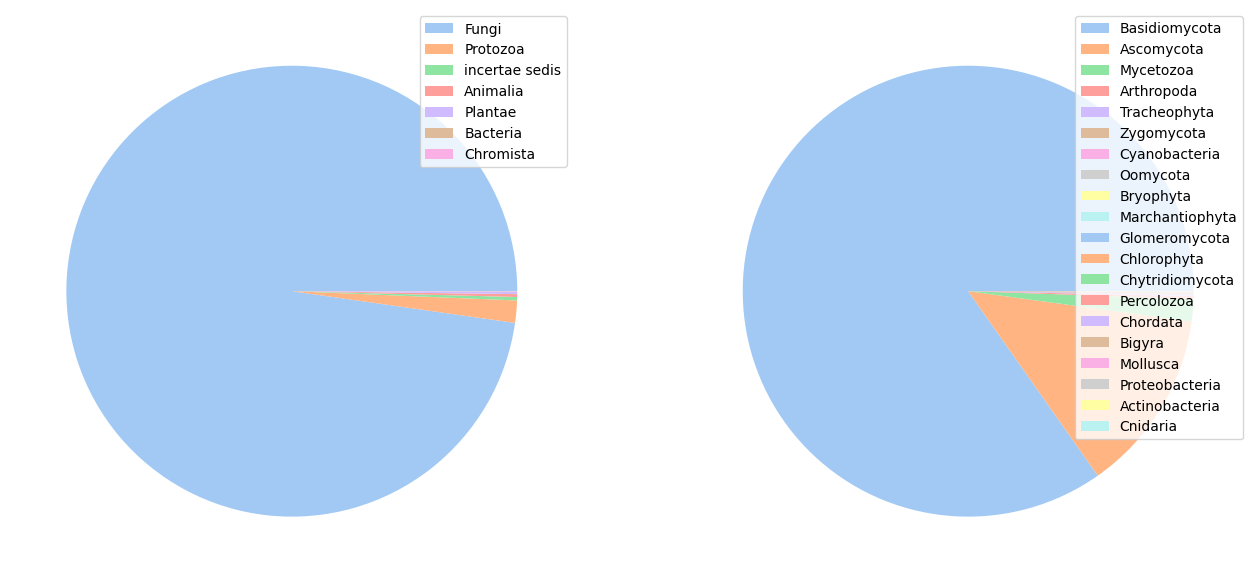

In [10]:
#par kingdom, phylum
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,8))

colors = sns.color_palette("pastel")
ax1.pie(pd.DataFrame(new_df['kingdom'].value_counts()).reset_index()['count'], colors=colors);
ax1.legend(pd.DataFrame(new_df['kingdom'].value_counts()).reset_index()['kingdom'], loc="upper right")

colors = sns.color_palette("pastel")
ax2.pie(pd.DataFrame(new_df['phylum'].value_counts()).reset_index()['count'], colors=colors);
ax2.legend(pd.DataFrame(new_df['phylum'].value_counts()).reset_index()['phylum'], loc="upper right")

#pour chaque il y a une valeur qui ressort particulièrement


In [11]:
#par class (trop de valeurs pour un camembert)
class_counts = new_df['class'].value_counts()
class_percentages = (class_counts / class_counts.sum() * 100).round(2)
class_counts_df = pd.DataFrame({'Count': class_counts.values}, index=class_counts.index)
class_counts_df['Percentage'] = class_percentages.values
display(class_counts_df.T)

class       Agaricomycetes  Lecanoromycetes  Pezizomycetes  Sordariomycetes  \
Count            172008.00         11379.00        6519.00          5035.00   
Percentage           84.01             5.56           3.18             2.46   

class       Myxomycetes  Leotiomycetes  Dacrymycetes  Tremellomycetes  \
Count           2641.00        2105.00        1032.0           703.00   
Percentage         1.29           1.03           0.5             0.34   

class       Eurotiomycetes  Arthoniomycetes  ...  Gastropoda  \
Count               444.00           376.00  ...         1.0   
Percentage            0.22             0.18  ...         0.0   

class       Gammaproteobacteria  Polypodiopsida  Equisetopsida  \
Count                       1.0             1.0            1.0   
Percentage                  0.0             0.0            0.0   

class       Malasseziomycetes  Dictyosteliomycetes  Trebouxiophyceae  \
Count                     1.0                  1.0               1.0   
Percentage                0.0                  0.0               0.0   

class       Bryopsida  Jungermanniopsida  Hydrozoa  
Count             1.0                1.0       1.0  
Percentage        0.0                0.0       0.0  

[2 rows x 53 columns]

In [12]:
# #par family, genus, species
# fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(8,20))

# sns.histplot(new_df['family'], ax=ax1, color='skyblue', kde=True);
# sns.histplot(new_df['genus'], ax=ax2, color='salmon', kde=True);
# sns.histplot(new_df['species'], ax=ax3, color='green', kde=True);

# ax1.set_title('Distribution des familles')
# ax2.set_title('Distribution des genres')
# ax3.set_title('Distribution des espèces')

C:\Users\matti\AppData\Local\Temp\ipykernel_16576\1278000294.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\matti\AppData\Local\Temp\ipykernel_16576\1278000294.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\matti\AppData\Local\Temp\ipykernel_16576\1278000294.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


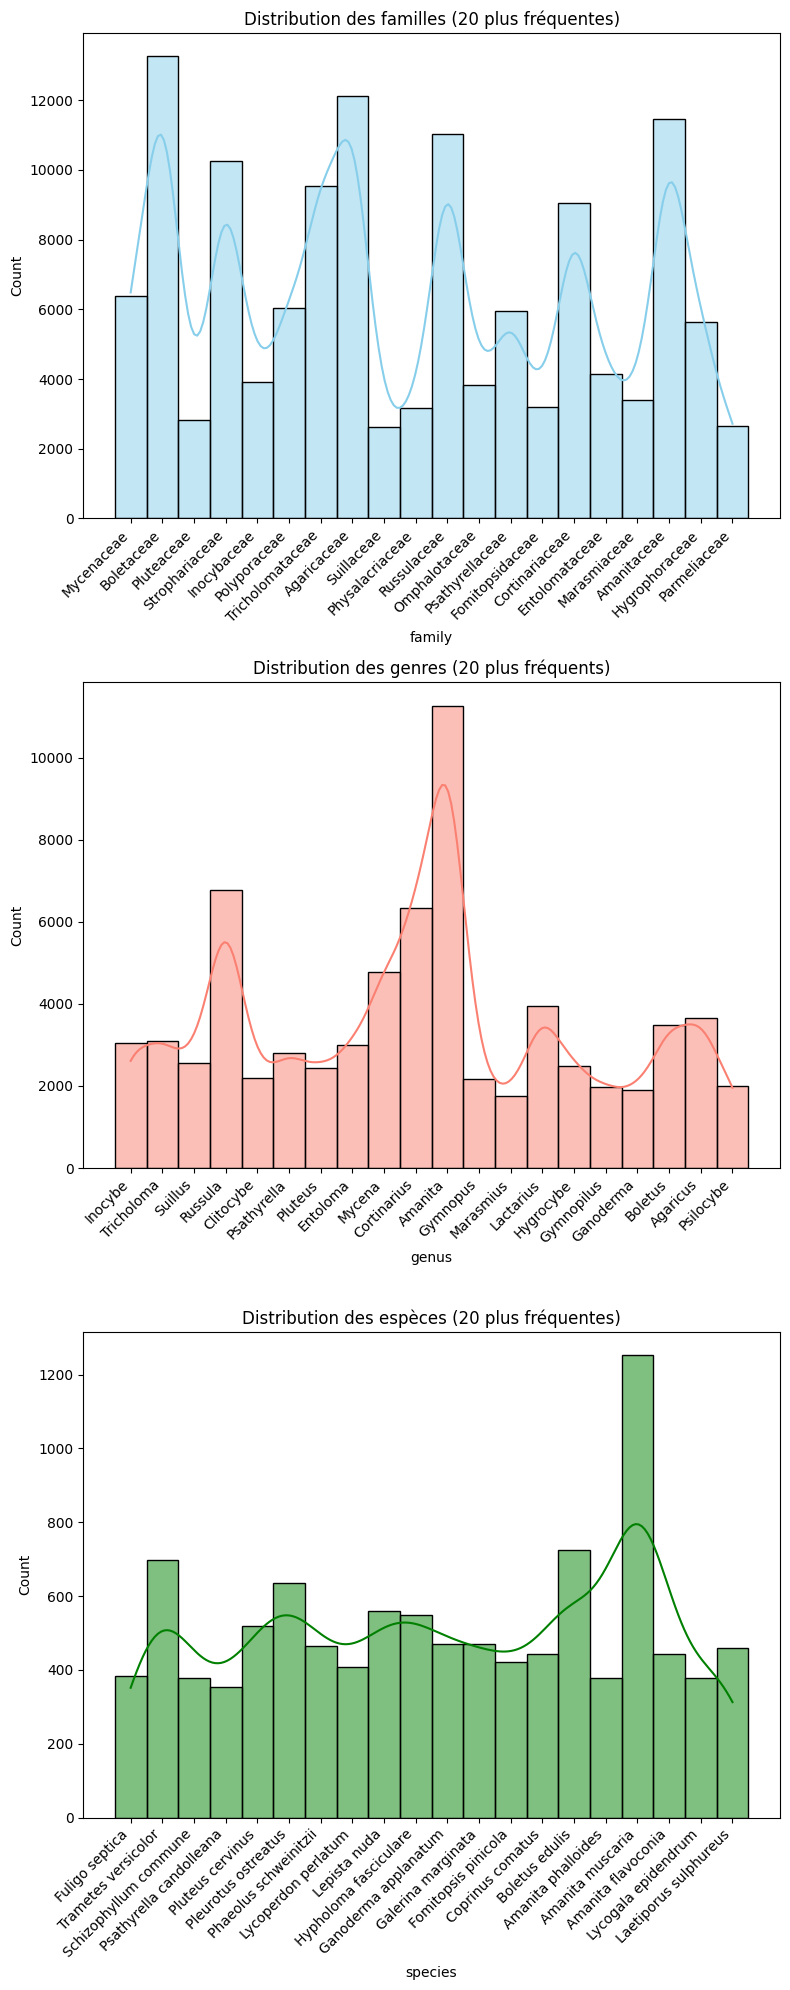

In [13]:
########Affichage des 20 meilleurs##############
# Triez les données selon les comptages
family_counts = new_df['family'].value_counts().nlargest(20)
genus_counts = new_df['genus'].value_counts().nlargest(20)
species_counts = new_df['species'].value_counts().nlargest(20)

# Créez une figure avec trois sous-graphiques
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 20))

# Tracer les histplots avec les données triées
sns.histplot(new_df[new_df['family'].isin(family_counts.index)], x='family', ax=ax1, color='skyblue', kde=True);
sns.histplot(new_df[new_df['genus'].isin(genus_counts.index)], x='genus', ax=ax2, color='salmon', kde=True);
sns.histplot(new_df[new_df['species'].isin(species_counts.index)], x='species', ax=ax3, color='green', kde=True);

# Définir les titres des graphiques
ax1.set_title('Distribution des familles (20 plus fréquentes)')
ax2.set_title('Distribution des genres (20 plus fréquents)')
ax3.set_title('Distribution des espèces (20 plus fréquentes)')

# Tourner les labels des valeurs sur l'axe x
for ax in [ax1, ax2, ax3]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

C:\Users\matti\AppData\Local\Temp\ipykernel_16576\2195395821.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\matti\AppData\Local\Temp\ipykernel_16576\2195395821.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\matti\AppData\Local\Temp\ipykernel_16576\2195395821.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


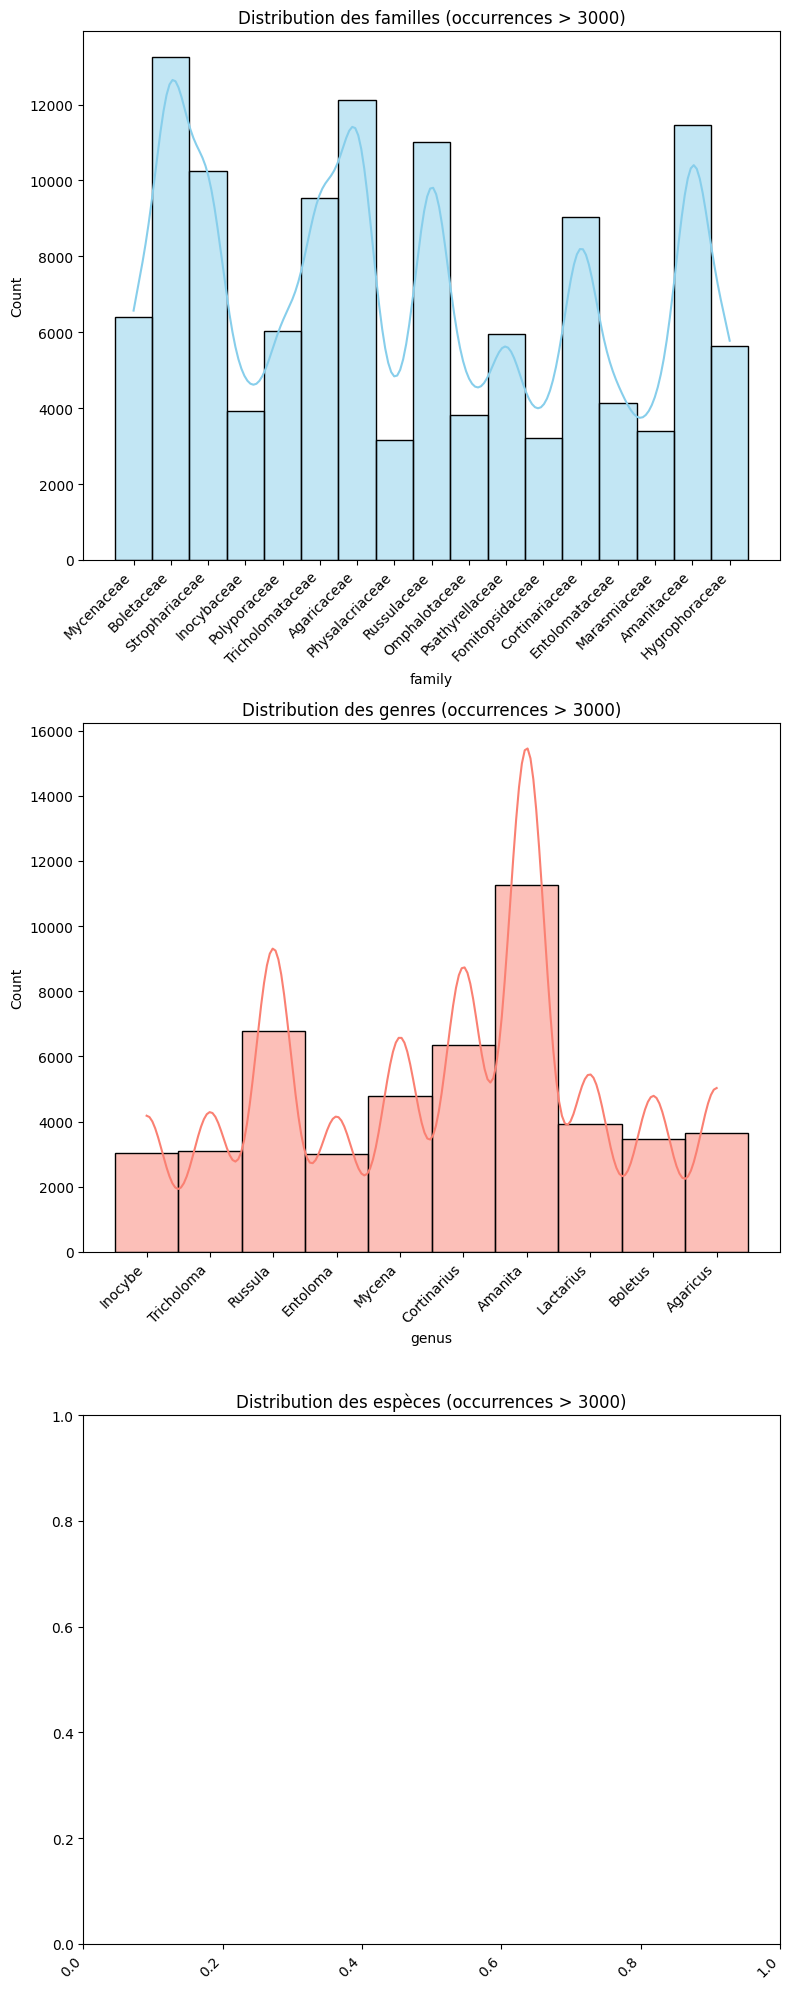

In [14]:
############Affichage des +3000 occurrences#############
# Filtrer les données pour inclure uniquement les labels avec plus de 3000 occurrences
filtered_family = new_df['family'].value_counts()[new_df['family'].value_counts() > 3000].index
filtered_genus = new_df['genus'].value_counts()[new_df['genus'].value_counts() > 3000].index
filtered_species = new_df['species'].value_counts()[new_df['species'].value_counts() > 3000].index

# Créer un sous-ensemble de données contenant uniquement ces labels filtrés
filtered_df_family = new_df[new_df['family'].isin(filtered_family)]
filtered_df_genus = new_df[new_df['genus'].isin(filtered_genus)]
filtered_df_species = new_df[new_df['species'].isin(filtered_species)]

# Créer la figure et les sous-graphiques
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 20))

# Tracer les histogrammes avec les données filtrées
sns.histplot(filtered_df_family['family'], ax=ax1, color='skyblue', kde=True);
sns.histplot(filtered_df_genus['genus'], ax=ax2, color='salmon', kde=True);
sns.histplot(filtered_df_species['species'], ax=ax3, color='green', kde=True);

# Définir les titres des sous-graphiques
ax1.set_title('Distribution des familles (occurrences > 3000)')
ax2.set_title('Distribution des genres (occurrences > 3000)')
ax3.set_title('Distribution des espèces (occurrences > 3000)')

# Tourner les labels des valeurs sur l'axe x
for ax in [ax1, ax2, ax3]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

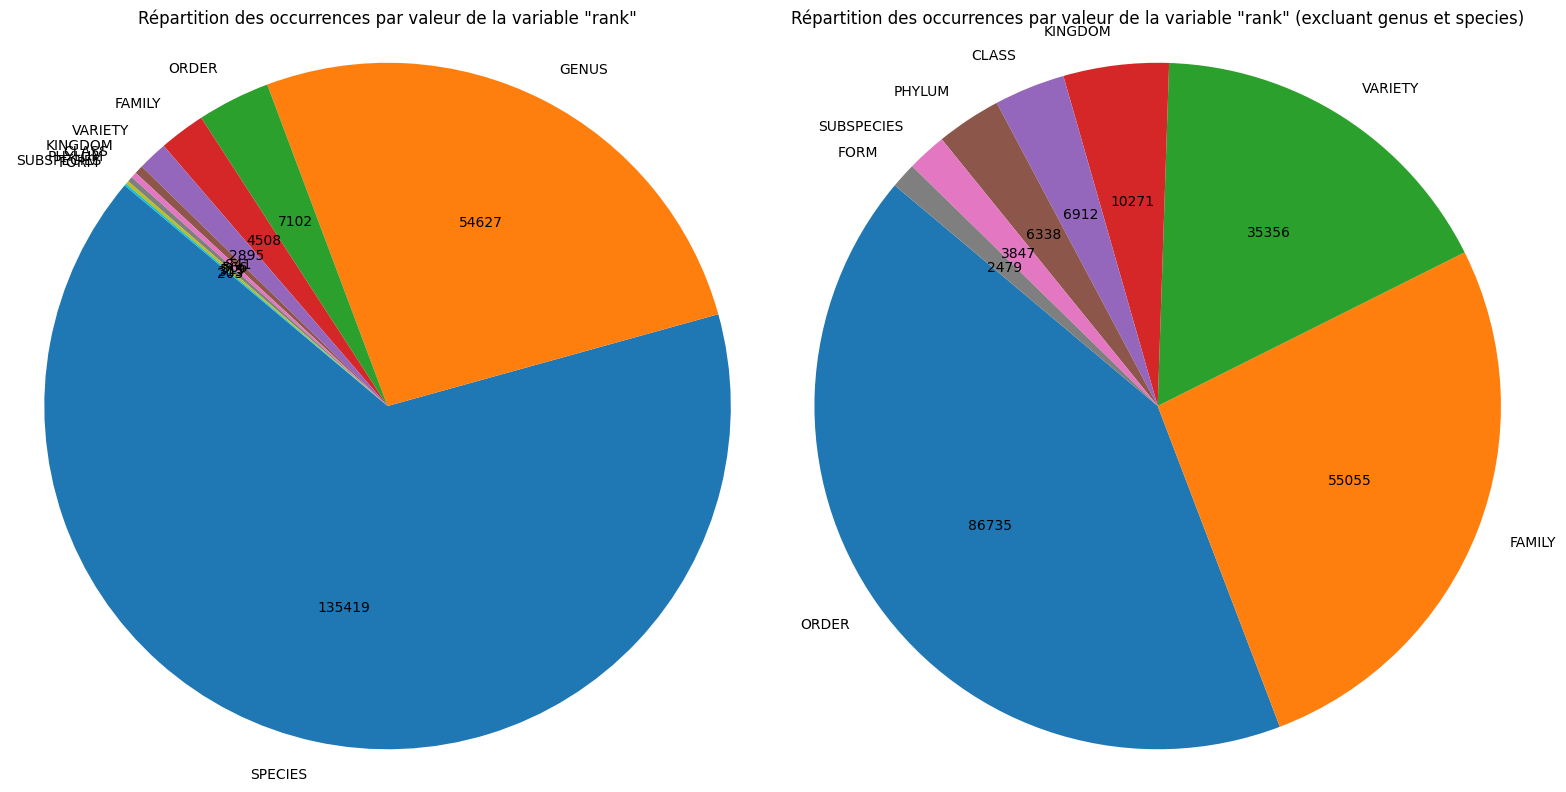

In [15]:
# Fonction pour formatter le texte à afficher sur les tranches du camembert
def formatter(pct):
    total = sum(occurrences_all)
    val = int(round(pct*total/100.0))
    return '{:d}'.format(val)

# Créer la figure et les sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Premier camembert : toutes les valeurs de 'rank'
occurrences_all = new_df['rank'].value_counts()
ax1.pie(occurrences_all, labels=occurrences_all.index, autopct=formatter, startangle=140)
ax1.set_title('Répartition des occurrences par valeur de la variable "rank"')

# Deuxième camembert : valeurs de 'rank' excluant 'genus' et 'species'
filtered_df = new_df[(new_df['rank'] != 'GENUS') & (new_df['rank'] != 'SPECIES')]
occurrences_filtered = filtered_df['rank'].value_counts()
ax2.pie(occurrences_filtered, labels=occurrences_filtered.index, autopct=formatter, startangle=140)
ax2.set_title('Répartition des occurrences par valeur de la variable "rank" (excluant genus et species)')

# Assure que les camemberts sont circulaires
ax1.axis('equal')
ax2.axis('equal')

# Afficher les graphiques
plt.tight_layout()
plt.show()

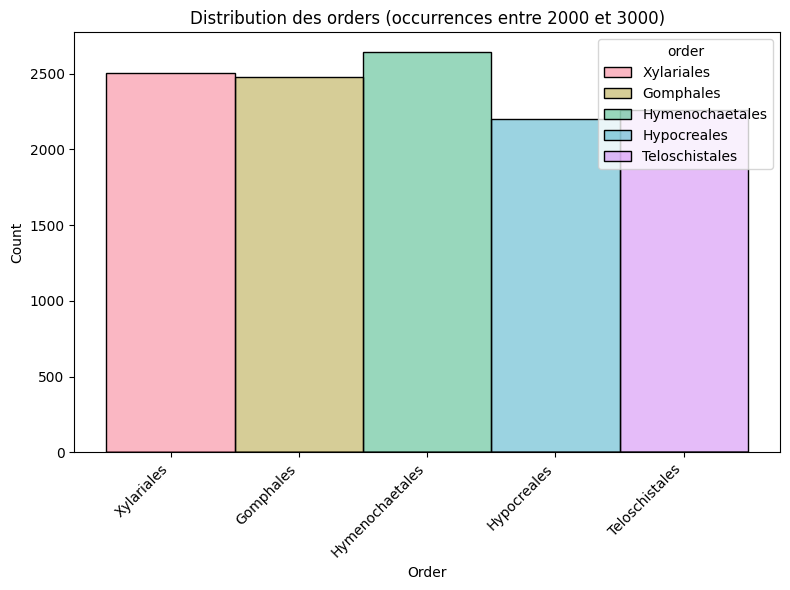

In [16]:
############Affichage odrder avec entre 2000 et 3000 occurences############
# Filtrer les données pour inclure uniquement les labels avec 2000 à 3000 occurrences
filtered_order = new_df['order'].value_counts()[(new_df['order'].value_counts() <= 3000) & (new_df['order'].value_counts() >= 2000)].index
 
# Créer un sous-ensemble de données contenant uniquement ces labels filtrés
filtered_df_order = new_df[new_df['order'].isin(filtered_order)]
 
# Créer la figure et les sous-graphiques
plt.figure(figsize=(8, 6))
 
# Tracer les histogrammes avec les données filtrées
sns.histplot(filtered_df_order, x = 'order', kde=True,
             palette = sns.color_palette("husl", len(filtered_order)),
             hue = 'order')
 
# Définir les titres des sous-graphiques
plt.title('Distribution des orders (occurrences entre 2000 et 3000)')
plt.xlabel('Order')
plt.ylabel('Count')
 
plt.xticks(rotation=45, ha='right')
 
plt.tight_layout()
plt.show()

In [17]:
##############Dataset qui ne garde que les variables qui nous interesse#################

#Sélection des orders entre 2000 et 3000
order_range = new_df[new_df['order'].isin(['Xylariales','Gomphales','Hymenochaetales','Hypocreales','Teloschistales'])]

#Filtre sur les variables
order_df = order_range[['image_id','image_url','date','order']]

#Nombre de lignes total
order_df.shape[0]

12079

In [18]:
order_df

image_id                                      image_url  \
0            1       http://mushroomobserver.org/images/320/1   
1            2       http://mushroomobserver.org/images/320/2   
2            3       http://mushroomobserver.org/images/320/3   
3            4       http://mushroomobserver.org/images/320/4   
130        131     http://mushroomobserver.org/images/320/131   
...        ...                                            ...   
68103   672696  http://mushroomobserver.org/images/320/672696   
68113   672699  http://mushroomobserver.org/images/320/672699   
68280   672879  http://mushroomobserver.org/images/320/672879   
68289   672886  http://mushroomobserver.org/images/320/672886   
68383   672992  http://mushroomobserver.org/images/320/672992   

                      date            order  
0      2006-05-21 07:17:05       Xylariales  
1      2006-05-21 07:17:06       Xylariales  
2      2006-05-21 07:17:08       Xylariales  
3      2006-05-21 07:17:10       Xylariales  
130    2006-05-21 07:20:10        Gomphales  
...                    ...              ...  
68103  2016-10-11 17:55:48      Hypocreales  
68113  2016-10-11 18:07:53  Hymenochaetales  
68280  2016-10-11 20:34:12      Hypocreales  
68289  2016-10-11 20:59:23  Hymenochaetales  
68383  2016-10-11 23:35:09      Hypocreales  

[12079 rows x 4 columns]

In [19]:
#Premiers tests sur peu de données (optimiser plus tard en boucle for) : on garde 10 lignes par order
df_Xy = order_df[order_df.order == 'Xylariales'].head(10)
df_Hyp = order_df[order_df.order == 'Hypocreales'].head(10)
df_Hym = order_df[order_df.order == 'Hymenochaetales'].head(10)
df_Gom = order_df[order_df.order == 'Gomphales'].head(10)
df_Te = order_df[order_df.order == 'Teloschistales'].head(10)
order_df_test = pd.concat([df_Xy,df_Hyp,df_Hym,df_Gom,df_Te], axis=0)
order_df_test

image_id                                     image_url  \
0            1      http://mushroomobserver.org/images/320/1   
1            2      http://mushroomobserver.org/images/320/2   
2            3      http://mushroomobserver.org/images/320/3   
3            4      http://mushroomobserver.org/images/320/4   
988        983    http://mushroomobserver.org/images/320/983   
1079      1078   http://mushroomobserver.org/images/320/1078   
1298      1282   http://mushroomobserver.org/images/320/1282   
1361      1361   http://mushroomobserver.org/images/320/1361   
1412      1385   http://mushroomobserver.org/images/320/1385   
2224      2296   http://mushroomobserver.org/images/320/2296   
247        251    http://mushroomobserver.org/images/320/251   
337        343    http://mushroomobserver.org/images/320/343   
338        344    http://mushroomobserver.org/images/320/344   
339        345    http://mushroomobserver.org/images/320/345   
340        346    http://mushroomobserver.org/images/320/346   
826        821    http://mushroomobserver.org/images/320/821   
877        873    http://mushroomobserver.org/images/320/873   
1063      1063   http://mushroomobserver.org/images/320/1063   
1964      1978   http://mushroomobserver.org/images/320/1978   
2426      2515   http://mushroomobserver.org/images/320/2515   
194        195    http://mushroomobserver.org/images/320/195   
195        196    http://mushroomobserver.org/images/320/196   
196        197    http://mushroomobserver.org/images/320/197   
500        511    http://mushroomobserver.org/images/320/511   
768        769    http://mushroomobserver.org/images/320/769   
843        839    http://mushroomobserver.org/images/320/839   
849        845    http://mushroomobserver.org/images/320/845   
864        859    http://mushroomobserver.org/images/320/859   
882        878    http://mushroomobserver.org/images/320/878   
935        933    http://mushroomobserver.org/images/320/933   
130        131    http://mushroomobserver.org/images/320/131   
131        132    http://mushroomobserver.org/images/320/132   
132        133    http://mushroomobserver.org/images/320/133   
133        134    http://mushroomobserver.org/images/320/134   
134        135    http://mushroomobserver.org/images/320/135   
135        136    http://mushroomobserver.org/images/320/136   
136        137    http://mushroomobserver.org/images/320/137   
138        139    http://mushroomobserver.org/images/320/139   
139        140    http://mushroomobserver.org/images/320/140   
140        141    http://mushroomobserver.org/images/320/141   
11145    11427  http://mushroomobserver.org/images/320/11427   
11574    11829  http://mushroomobserver.org/images/320/11829   
15966    16467  http://mushroomobserver.org/images/320/16467   
17706    18285  http://mushroomobserver.org/images/320/18285   
17707    18286  http://mushroomobserver.org/images/320/18286   
18139    18782  http://mushroomobserver.org/images/320/18782   
18160    18805  http://mushroomobserver.org/images/320/18805   
18162    18807  http://mushroomobserver.org/images/320/18807   
18165    18810  http://mushroomobserver.org/images/320/18810   
18263    18855  http://mushroomobserver.org/images/320/18855   

                      date            order  
0      2006-05-21 07:17:05       Xylariales  
1      2006-05-21 07:17:06       Xylariales  
2      2006-05-21 07:17:08       Xylariales  
3      2006-05-21 07:17:10       Xylariales  
988    2006-10-15 19:52:50       Xylariales  
1079   2006-11-05 04:16:33       Xylariales  
1298   2006-11-24 06:49:50       Xylariales  
1361   2006-11-27 04:13:09       Xylariales  
1412   2006-11-29 06:20:48       Xylariales  
2224   2007-01-05 17:06:36       Xylariales  
247    2006-05-21 07:23:22      Hypocreales  
337    2006-05-21 07:26:02      Hypocreales  
338    2006-05-21 07:26:03      Hypocreales  
339    2006-05-21 07:26:05      Hypocreales  
340    2006-05-21 07:26:06      Hypocreales  
826  

In [20]:
#################### ON AJOUTE TOUTES LES PHOTOS DU DF DANS UN FICHIER#########################

import requests
import shutil
import pandas as pd
import sys
from pathlib import Path
 
 
 
for index, row in order_df_test.iterrows():
 
    #Ecrire l'URL qui sera telechargeable
    url_tel ="https://images.mushroomobserver.org/" +  row['image_url'].split("/")[-2] + "/" + row['image_url'].split("/")[-1]  + ".jpg"
    print(url_tel)
 
    filename = "./images/" + row['image_url'].split("/")[-1] + ".jpg"
 
 
    if Path(filename).is_file() == False:
        # Open the url image, set stream to True, this will return the stream content.
        r = requests.get(url_tel, stream = True)
 
        # Check if the image was retrieved successfully
        if r.status_code == 200:
            # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
            r.raw.decode_content = True
           
            # Open a local file with wb ( write binary ) permission.
            with open(filename,'wb') as f:
                shutil.copyfileobj(r.raw, f)
               
            print('Image sucessfully Downloaded: ',url_tel,filename)
        else:
            print('Image Couldn\'t be retreived :',url_tel,filename)

https://images.mushroomobserver.org/320/1.jpg
https://images.mushroomobserver.org/320/2.jpg
https://images.mushroomobserver.org/320/3.jpg
https://images.mushroomobserver.org/320/4.jpg
https://images.mushroomobserver.org/320/983.jpg
https://images.mushroomobserver.org/320/1078.jpg
https://images.mushroomobserver.org/320/1282.jpg
https://images.mushroomobserver.org/320/1361.jpg
https://images.mushroomobserver.org/320/1385.jpg
https://images.mushroomobserver.org/320/2296.jpg
https://images.mushroomobserver.org/320/251.jpg
https://images.mushroomobserver.org/320/343.jpg
https://images.mushroomobserver.org/320/344.jpg
https://images.mushroomobserver.org/320/345.jpg
https://images.mushroomobserver.org/320/346.jpg
https://images.mushroomobserver.org/320/821.jpg
https://images.mushroomobserver.org/320/873.jpg
https://images.mushroomobserver.org/320/1063.jpg
https://images.mushroomobserver.org/320/1978.jpg
https://images.mushroomobserver.org/320/2515.jpg
https://images.mushroomobserver.org/320/

In [22]:
###################### ON PARCOURT LE FICHIER DES PHOTOS POUR LES AJOUTER AU DF #########################################
import os
from os import listdir
from os.path import isfile, join
from PIL import Image

path = './images/'
listFiles = [f for f in listdir(path) if isfile(join(path, f))]

# Fonction pour ouvrir une image à partir du chemin d'accès
def ouvrir_image(chemin):
    return Image.open(path + str(chemin) + '.jpg')

# Appliquer la fonction pour ouvrir chaque image et stocker les résultats dans une nouvelle colonne
order_df_test['image_visuelle'] = order_df_test['image_id'].apply(ouvrir_image)


In [23]:
########################### METTRE LES IMAGES EN ARRAY #########################
import numpy as np

# Fonction pour convertir une image PIL en tableau numpy
def image_to_array(image):
    return np.array(image)

# Appliquer la fonction pour convertir chaque image et stocker les résultats dans une nouvelle colonne
order_df_test['image_array'] = order_df_test['image_visuelle'].apply(image_to_array)

display(order_df_test.head(10))


image_id                                    image_url  \
0           1     http://mushroomobserver.org/images/320/1   
1           2     http://mushroomobserver.org/images/320/2   
2           3     http://mushroomobserver.org/images/320/3   
3           4     http://mushroomobserver.org/images/320/4   
988       983   http://mushroomobserver.org/images/320/983   
1079     1078  http://mushroomobserver.org/images/320/1078   
1298     1282  http://mushroomobserver.org/images/320/1282   
1361     1361  http://mushroomobserver.org/images/320/1361   
1412     1385  http://mushroomobserver.org/images/320/1385   
2224     2296  http://mushroomobserver.org/images/320/2296   

                     date       order  \
0     2006-05-21 07:17:05  Xylariales   
1     2006-05-21 07:17:06  Xylariales   
2     2006-05-21 07:17:08  Xylariales   
3     2006-05-21 07:17:10  Xylariales   
988   2006-10-15 19:52:50  Xylariales   
1079  2006-11-05 04:16:33  Xylariales   
1298  2006-11-24 06:49:50  Xylariales   
1361  2006-11-27 04:13:09  Xylariales   
1412  2006-11-29 06:20:48  Xylariales   
2224  2007-01-05 17:06:36  Xylariales   

                                         image_visuelle  \
0     <PIL.JpegImagePlugin.JpegImageFile image mode=...   
1     <PIL.JpegImagePlugin.JpegImageFile image mode=...   
2     <PIL.JpegImagePlugin.JpegImageFile image mode=...   
3     <PIL.JpegImagePlugin.JpegImageFile image mode=...   
988   <PIL.JpegImagePlugin.JpegImageFile image mode=...   
1079  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
1298  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
1361  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
1412  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
2224  <PIL.JpegImagePlugin.JpegImageFile image mode=...   

                                            image_array  
0     [[[117, 99, 111], [118, 101, 109], [119, 103, ...  
1     [[[18, 9, 10], [18, 9, 10], [19, 11, 9], [19, ...  
2     [[[87, 57, 57], [92, 62, 64], [97, 68, 70], [1...  
3     [[[6, 5, 1], [6, 5, 1], [7, 6, 2], [8, 7, 3], ...  
988   [[[229, 223, 223], [228, 222, 222], [227, 221,...  
1079  [[[86, 91, 69], [86, 91, 69], [85, 90, 68], [8...  
1298  [[[107, 138, 60], [103, 134, 56], [98, 131, 50...  
1361  [[[47, 32, 25], [109, 93, 78], [138, 122, 96],...  
1412  [[[97, 87, 96], [95, 85, 94], [97, 85, 97], [1...  
2224  [[[95, 101, 87], [56, 63, 47], [59, 61, 47], [...

In [24]:
#Si tu veux voir une ptite image c'est par ici
order_df_test['image_array'].iloc[1].show()

AttributeError: 'numpy.ndarray' object has no attribute 'show'

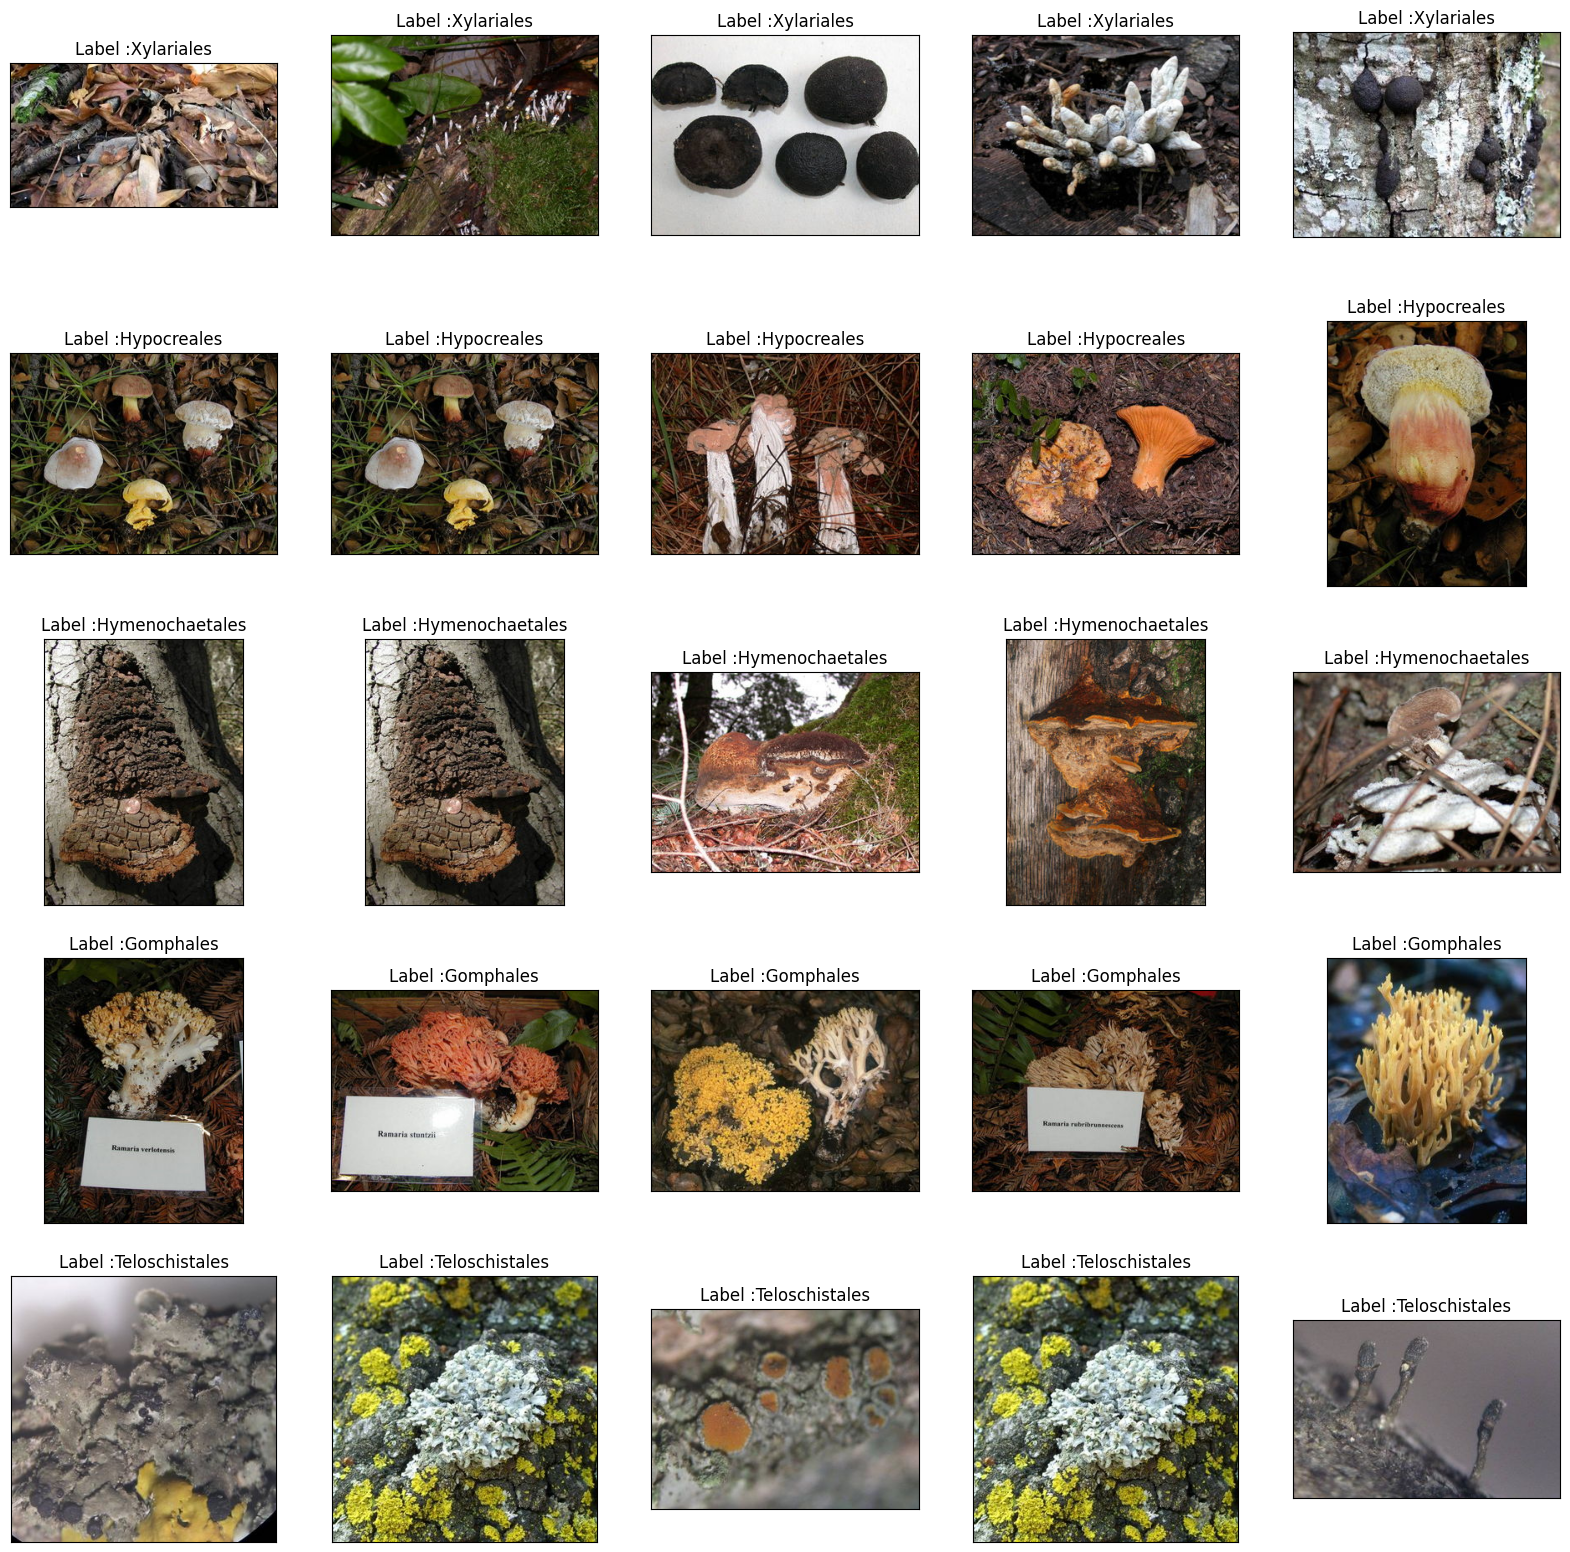

In [25]:
############## MONTRER LES 10 PREMIERES IMAGES DE CHAQUE ORDER POUR VOIR A L'OEIL NU ################
#(dans le futur mettre des paramètres qui varient)

from random import randint
from matplotlib import cm

nb_col = 5 
nb_ligne = 5
j = 1
orders = order_df_test['order'].unique()

plt.figure(figsize=(20,20))
for i in range(len(orders)):
    df = order_df_test[order_df_test.order == orders[i]]
    for y in range(nb_col):
        nb = randint(0,len(df)-1)
        sample0 = df.iloc[nb]['image_array']
        plt.subplot(nb_ligne,nb_col,j)
        j+=1
        plt.xticks([])
        plt.yticks([])
        plt.imshow(sample0,cmap=cm.binary,interpolation=None)
        plt.title(f"Label :{orders[i]}")
        

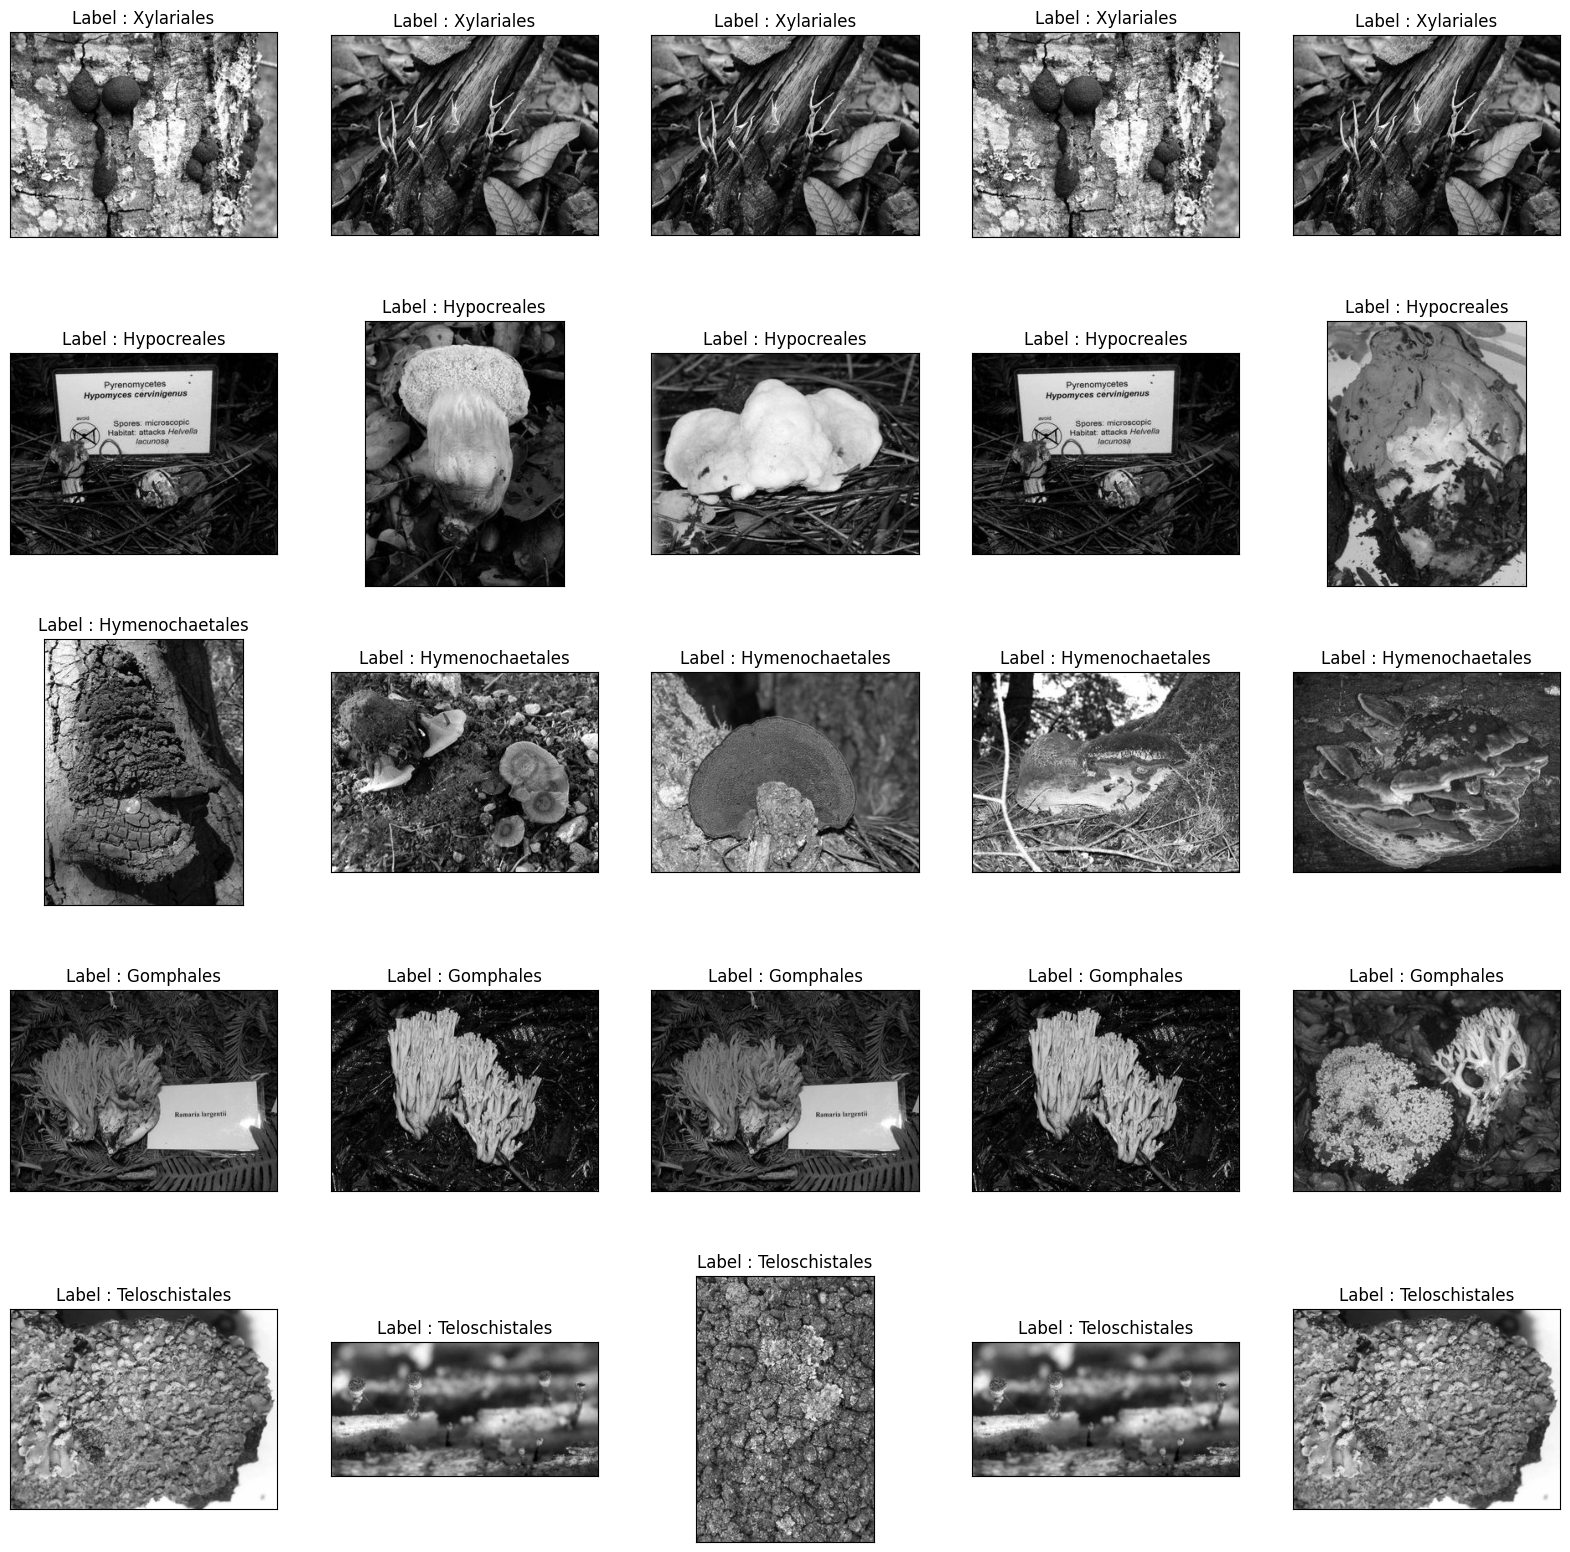

In [26]:
import cv2
 
def gray_scale_img(img) :
    return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)
 
order_df_test['image_gris'] = order_df_test['image_visuelle'].apply(gray_scale_img)
order_df_test['image_array_gris'] = order_df_test['image_gris'].apply(image_to_array)
 
nb_col = 5
nb_ligne = 5
j = 1
orders = order_df_test['order'].unique()
 
plt.figure(figsize=(20,20))
for i in range(len(orders)):
    df = order_df_test[order_df_test.order == orders[i]]
    for y in range(nb_col):
        nb = randint(0,len(df)-1)
        sample0 = df.iloc[nb]['image_array_gris']
        plt.subplot(nb_ligne,nb_col,j)
        j+=1
        plt.xticks([])
        plt.yticks([])
        plt.imshow(sample0,cmap='gray',interpolation=None)
        plt.title(f"Label : {orders[i]}")

In [27]:
#Taille des images
for i in range(0,5):
    print(order_df_test['image_visuelle'].iloc[i].size)
 
#Reduction des pixels
def reduction(img):
    return np.resize(img,(256,256))
   
order_df_test['image_array_gris_256'] = order_df_test['image_array_gris'].apply(reduction)
 
#Verification
for i in range(0,5):
    print(order_df_test['image_array_gris_256'].iloc[i].shape)

(320, 240)
(320, 240)
(320, 240)
(240, 320)
(320, 240)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)


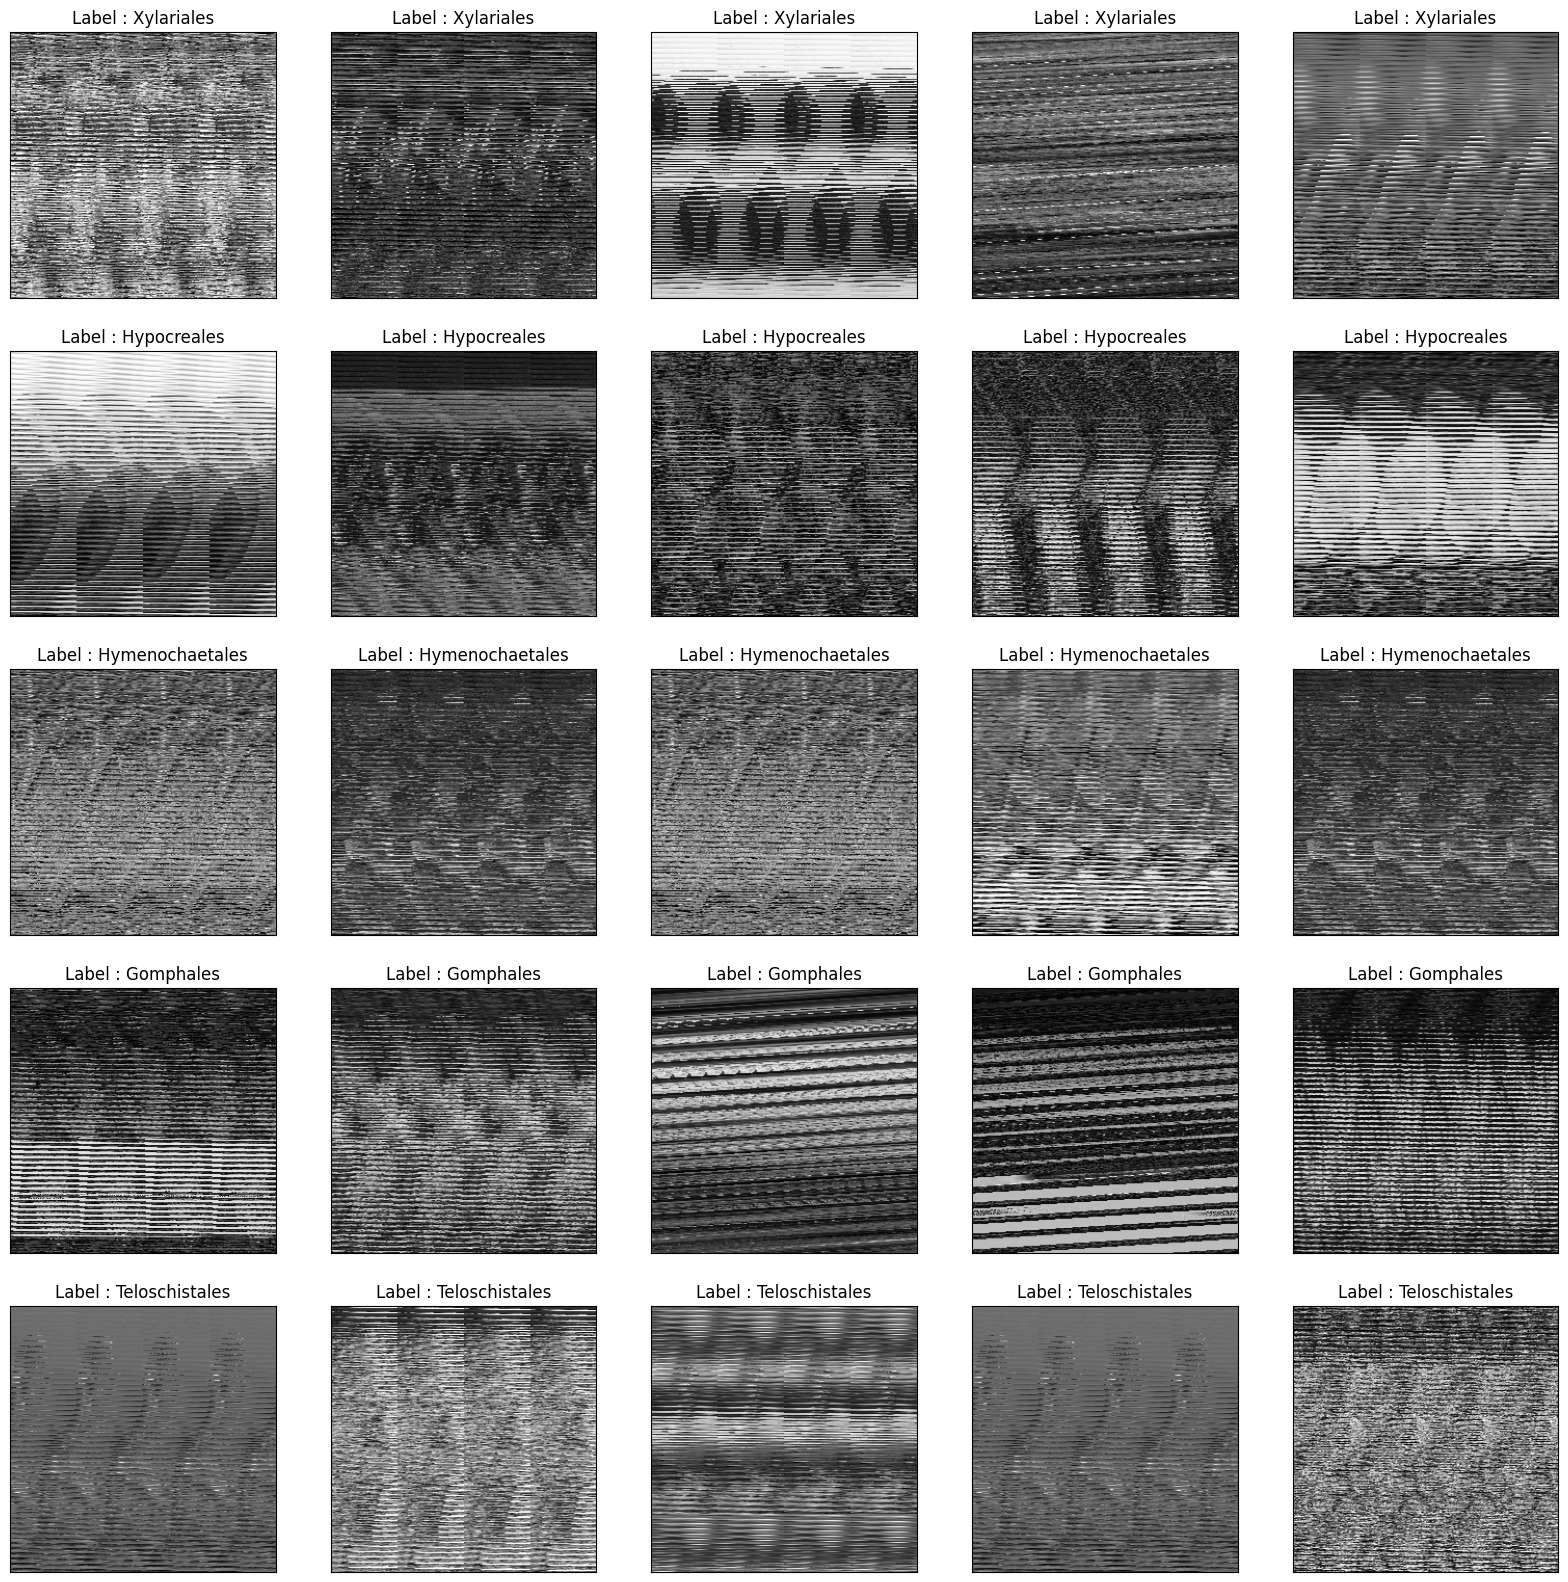

In [28]:
nb_col = 5
nb_ligne = 5
j = 1
orders = order_df_test['order'].unique()
 
plt.figure(figsize=(20,20))
for i in range(len(orders)):
    df = order_df_test[order_df_test.order == orders[i]]
    for y in range(nb_col):
        nb = randint(0,len(df)-1)
        sample0 = df.iloc[nb]['image_array_gris_256']
        plt.subplot(nb_ligne,nb_col,j)
        j+=1
        plt.xticks([])
        plt.yticks([])
        plt.imshow(sample0,cmap='gray',interpolation=None)
        plt.title(f"Label : {orders[i]}")